### Part 2 (Optional)
1. From [Data](https://unsplash.com/search/photos/jeep) use selenium to download all images of jeeps
2. Use OpenCV to reduce the amount of colors in the images
3. Use OpenCV to find corners [Help](https://docs.opencv.org/master/d8/dd8/tutorial_good_features_to_track.html)
4. (EXTRA) Find all the wheels

In [1]:
import os
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def download_image(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as f:
        f.write(response.content)

# URL for the website containing images of Jeeps
url = 'https://unsplash.com/s/photos/jeep'

# Configure the Selenium WebDriver
options = webdriver.FirefoxOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Start the Selenium WebDriver
driver = webdriver.Firefox(options=options)

# Go to the website
driver.get(url)

# Wait for the images to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, 'img')))

# Get all image elements
images = driver.find_elements(By.TAG_NAME, 'img')


# Create a directory to save the Jeep images
os.makedirs('jeep_images', exist_ok=True)

# Download all Jeep images
for i, img in enumerate(images):
    src = img.get_attribute('src')
    if src:
        save_path = os.path.join('jeep_images', f'jeep_{i}.jpg')
        download_image(src, save_path)

# Close the Selenium WebDriver
driver.quit()

print("Downloaded all Jeep images successfully.")


Downloaded all Jeep images successfully.


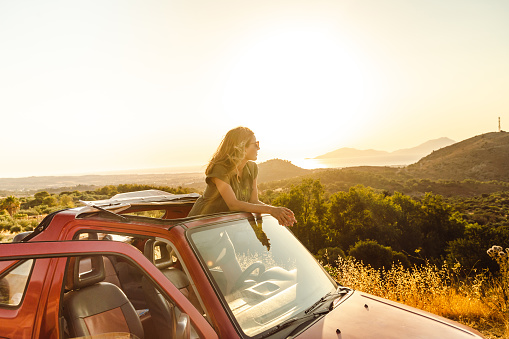

In [3]:


from PIL import Image
import os
from IPython.display import display

# angiv stien til mappen
mappe_sti = 'jeep_images'

# få en liste over filer i mappen
fil_navne = os.listdir(mappe_sti)

# åbn det første billede i mappen
første_billede = Image.open(os.path.join(mappe_sti, fil_navne[2]))

# vis billedet i notebooken
display(første_billede)


In [4]:
import os
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from PIL import Image

def download_image(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as f:
        f.write(response.content)

# URL for the website containing images of Jeeps
url = 'https://unsplash.com/s/photos/jeep'

# Configure the Selenium WebDriver
options = webdriver.FirefoxOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Start the Selenium WebDriver
driver = webdriver.Firefox(options=options)

# Go to the website
driver.get(url)

# Wait for the images to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, 'img')))

# Get all image elements
images = driver.find_elements(By.TAG_NAME, 'img')

# Create a directory to save the Jeep images
os.makedirs('jeep_images1', exist_ok=True)

# Download all Jeep images
for i, img in enumerate(images):
    src = img.get_attribute('src')
    if src:
        # Ignore the file jeep_images/jeep_118.jpg
        if i == 118:
            continue
        if i == 120:
            continue
        if i == 122:
            continue
        
        save_path = os.path.join('jeep_images1', f'jeep_{i}.jpg')
        download_image(src, save_path)
        
        # Check if the downloaded file is an image
        try:
            with Image.open(save_path) as im:
                width, height = im.size
                aspect_ratio = width/height
                if aspect_ratio < 0.7:
                    # Remove the cropped image
                    os.remove(save_path)
                    print(f'Removed {save_path}')
        except (IOError, UnidentifiedImageError):
            # Remove the file if it is not an image or cannot be opened
            os.remove(save_path)
            print(f'Removed {save_path}')

# Close the Selenium WebDriver
driver.quit()

print("Downloaded all Jeep images successfully.")


Removed jeep_images1/jeep_31.jpg
Removed jeep_images1/jeep_33.jpg
Removed jeep_images1/jeep_37.jpg
Removed jeep_images1/jeep_39.jpg
Removed jeep_images1/jeep_41.jpg
Removed jeep_images1/jeep_49.jpg
Removed jeep_images1/jeep_53.jpg
Removed jeep_images1/jeep_62.jpg
Removed jeep_images1/jeep_64.jpg
Removed jeep_images1/jeep_67.jpg
Removed jeep_images1/jeep_68.jpg
Removed jeep_images1/jeep_73.jpg
Removed jeep_images1/jeep_74.jpg
Removed jeep_images1/jeep_75.jpg
Removed jeep_images1/jeep_84.jpg
Removed jeep_images1/jeep_85.jpg
Removed jeep_images1/jeep_93.jpg
Removed jeep_images1/jeep_94.jpg
Removed jeep_images1/jeep_98.jpg
Removed jeep_images1/jeep_99.jpg
Removed jeep_images1/jeep_105.jpg
Downloaded all Jeep images successfully.


In [5]:
import cv2
import numpy as np
import os

# Opret mappen 'jeep_images_reduced', hvis den ikke allerede findes
os.makedirs('jeep_images_reduced', exist_ok=True)

# Loop igennem alle filnavne i mappen 'jeep_images1'
for filename in os.listdir('jeep_images1'):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        try:
            # Læs billedet fra filen
            img = cv2.imread(os.path.join('jeep_images1', filename))

            # Konverter billedet til HSV-farverummet
            img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

            # KMeans farvereducering
            Z = img_hsv.reshape((-1,3))
            Z = np.float32(Z)
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
            K = 16
            ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
            center = np.uint8(center)
            res = center[label.flatten()]
            res2 = res.reshape((img_hsv.shape))

            # Konverter billedet tilbage til BGR-farverummet
            img_reduced = cv2.cvtColor(res2, cv2.COLOR_HSV2BGR)

            # Gem det farvereducerede billede i en ny fil i mappen 'jeep_images_reduced'
            reduced_filename = os.path.splitext(filename)[0] + '_reduced.jpg'
            cv2.imwrite(os.path.join('jeep_images_reduced', reduced_filename), img_reduced)
        
        except Exception as e:
            print(f'Fejl under behandling af filen "{filename}": {str(e)}')
            continue

print("Farvereduceringen blev gennemført for alle billeder i mappen 'jeep_images1', og de reducerede billeder blev gemt i mappen 'jeep_images_reduced'.")


Fejl under behandling af filen "jeep_119.jpg": OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Fejl under behandling af filen "jeep_121.jpg": OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Farvereduceringen blev gennemført for alle billeder i mappen 'jeep_images1', og de reducerede billeder blev gemt i mappen 'jeep_images_reduced'.


In [6]:
import os

folder_path = "jeep_images_reduced"

# Gå igennem alle filerne i mappen
for filename in os.listdir(folder_path):
    # Hvis filnavnet indeholder "2_"
    if "2_" in filename:
        # Få fuld sti til filen
        file_path = os.path.join(folder_path, filename)
        # Slet filen
        os.remove(file_path)


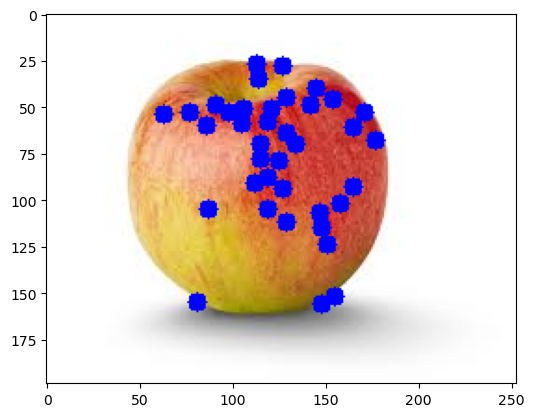

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Læs billedet af æblet
img = cv2.imread('apple.jpeg')

# Konverter billedet til gråtone
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find hjørner med cv2.goodFeaturesToTrack()
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.3, minDistance=7)

# Tegn hjørnerne på billedet
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, (255, 0, 0), -1)

# Vis resultatet med matplotlib.pyplot
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [8]:
import cv2
import os

wheels_dict = {}
corners_dict = {}

import os

path = 'jeep_images1'

import cv2
import os

# Sæt stien til mappen med billeder
path = 'jeep_images1'

# Loop igennem alle filer i mappen
for filename in os.listdir(path):

    # Tjek om filen er en billedfil
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):

        # Prøv at læse billedet
        try:
            # Læs billedet
            img = cv2.imread(os.path.join(path, filename))

            # Konverter billedet til gråtone
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Find hjørner med cv2.goodFeaturesToTrack()
            corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.3, minDistance=7)

            # Tæl antallet af hjørner
            num_corners = len(corners)

            # Udskriv antallet af hjørner for hver fil
            print(f"{filename}: {num_corners} corners")

        except Exception as e:
            # Hvis der opstår en fejl, udskriv navnet på filen og fejlbeskeden
            print(f"Could not process {filename}: {e}")



jeep_0.jpg: 61 corners
jeep_1.jpg: 100 corners
jeep_10.jpg: 45 corners
jeep_100.jpg: 32 corners
jeep_101.jpg: 77 corners
jeep_102.jpg: 38 corners
jeep_103.jpg: 100 corners
jeep_104.jpg: 43 corners
jeep_106.jpg: 48 corners
jeep_107.jpg: 100 corners
jeep_108.jpg: 50 corners
jeep_109.jpg: 55 corners
jeep_11.jpg: 22 corners
jeep_110.jpg: 48 corners
jeep_111.jpg: 100 corners
jeep_112.jpg: 50 corners
jeep_113.jpg: 55 corners
jeep_114.jpg: 30 corners
jeep_115.jpg: 63 corners
jeep_116.jpg: 26 corners
jeep_117.jpg: 100 corners
Could not process jeep_119.jpg: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

jeep_12.jpg: 43 corners
Could not process jeep_121.jpg: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

jeep_13.jpg: 84 corners
jeep_14.jpg: 58 corners
jeep_15.jpg: 38 corners
jeep_16.jpg: 100 corners
jeep_17.jpg: 41 corners
jeep_18.j